<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/myrtle-beach-paphos_summer_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.visualcrossing.com/weather/weather-data-services#

In [117]:

location="34.69741074283549,32.612644527285106"
date1="2024-07-16T00:00:00"
date2="2024-07-19T24:00:00"
apikey="ET2UEWPH7KFHT289DDMPTQJFV"

url="https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{0}/{1}/{2}?key={3}&include=hours".format(location,date1,date2,apikey)




import requests


headers = {'Accept': 'application/json'}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}")




{'queryCost': 73, 'latitude': 34.69741074283549, 'longitude': 32.612644527285106, 'resolvedAddress': '34.69741074283549,32.612644527285106', 'address': '34.69741074283549,32.612644527285106', 'timezone': 'Asia/Nicosia', 'tzoffset': 3.0, 'days': [{'datetime': '2024-07-16', 'datetimeEpoch': 1721077200, 'tempmax': 89.3, 'tempmin': 75.3, 'temp': 83.1, 'feelslikemax': 101.7, 'feelslikemin': 75.3, 'feelslike': 90.2, 'dew': 73.0, 'humidity': 72.7, 'precip': 0.0, 'precipprob': 0.0, 'precipcover': 0.0, 'preciptype': None, 'snow': 0.0, 'snowdepth': 0.0, 'windgust': 15.2, 'windspeed': 10.9, 'winddir': 296.1, 'pressure': 1004.0, 'cloudcover': 36.7, 'visibility': 6.0, 'solarradiation': 329.8, 'solarenergy': 28.6, 'uvindex': 10.0, 'severerisk': 5.0, 'sunrise': '05:48:35', 'sunriseEpoch': 1721098115, 'sunset': '20:02:34', 'sunsetEpoch': 1721149354, 'moonphase': 0.34, 'conditions': 'Partially cloudy', 'description': 'Clearing in the afternoon.', 'icon': 'partly-cloudy-day', 'stations': ['LCRA', 'F1785

In [122]:
import pandas as pd

df=pd.DataFrame(data['days'])

df['datetime'] = pd.to_datetime(df['datetimeEpoch'], unit='s')




In [123]:
df=df.explode("hours")

In [124]:
import datetime

df['datetime']=df['hours'].map(lambda l : datetime.datetime.fromtimestamp(l['datetimeEpoch']))

In [125]:
df.set_index('datetime', inplace=True)

In [126]:
df.index

DatetimeIndex(['2024-07-15 21:00:00', '2024-07-15 22:00:00',
               '2024-07-15 23:00:00', '2024-07-16 00:00:00',
               '2024-07-16 01:00:00', '2024-07-16 02:00:00',
               '2024-07-16 03:00:00', '2024-07-16 04:00:00',
               '2024-07-16 05:00:00', '2024-07-16 06:00:00',
               ...
               '2024-07-20 11:00:00', '2024-07-20 12:00:00',
               '2024-07-20 13:00:00', '2024-07-20 14:00:00',
               '2024-07-20 15:00:00', '2024-07-20 16:00:00',
               '2024-07-20 17:00:00', '2024-07-20 18:00:00',
               '2024-07-20 19:00:00', '2024-07-20 20:00:00'],
              dtype='datetime64[ns]', name='datetime', length=120, freq=None)

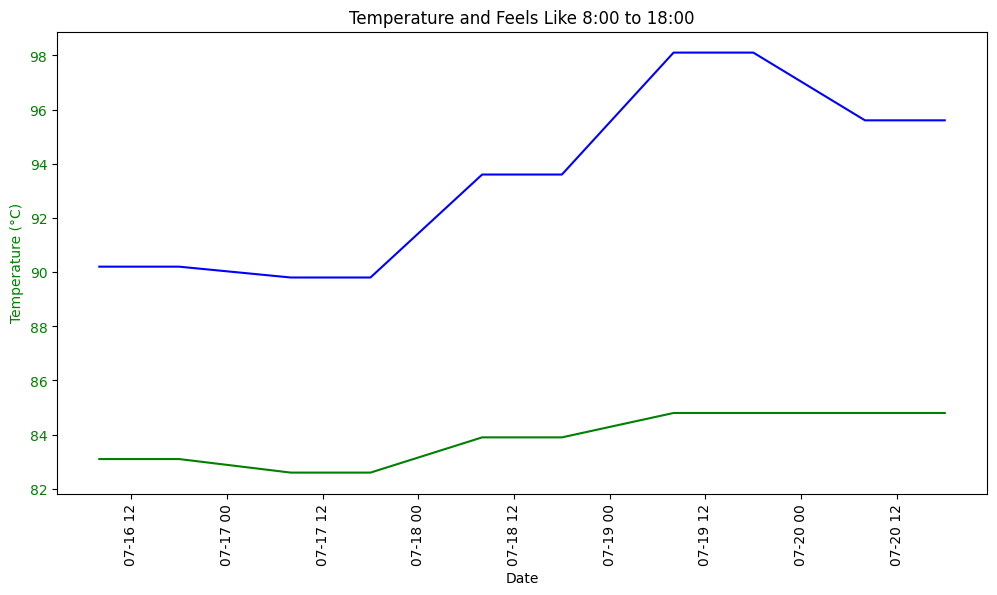

In [127]:
import pandas as pd
import matplotlib.pyplot as plt



# Read data from CSV files
#df = pd.read_csv('https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/stats/paphos.csv',
#                 parse_dates=['datetime'], index_col='datetime')



df=df.between_time('08:00', '18:00')


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature
ax1.plot(df.index, df['temp'], 'g', label='Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='g')
ax1.tick_params(axis='y', labelcolor='g')


ax1.plot(df.index, df['feelslike'], 'b', label='Feels Lile')



# Rotate x-ticks
plt.xticks(rotation=90)

# Add title
plt.title('Temperature and Feels Like 8:00 to 18:00')

# Show plot
plt.show()


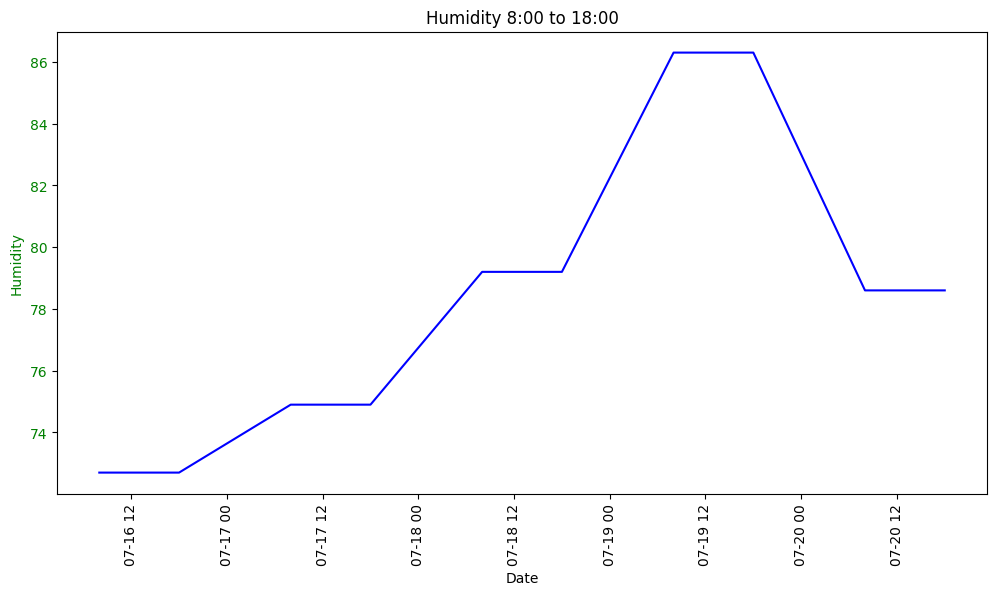

In [129]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature
ax1.plot(df.index, df['humidity'], 'b', label='Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity', color='g')
ax1.tick_params(axis='y', labelcolor='g')



# Rotate x-ticks
plt.xticks(rotation=90)

# Add title
plt.title('Humidity 8:00 to 18:00')

# Show plot
plt.show()

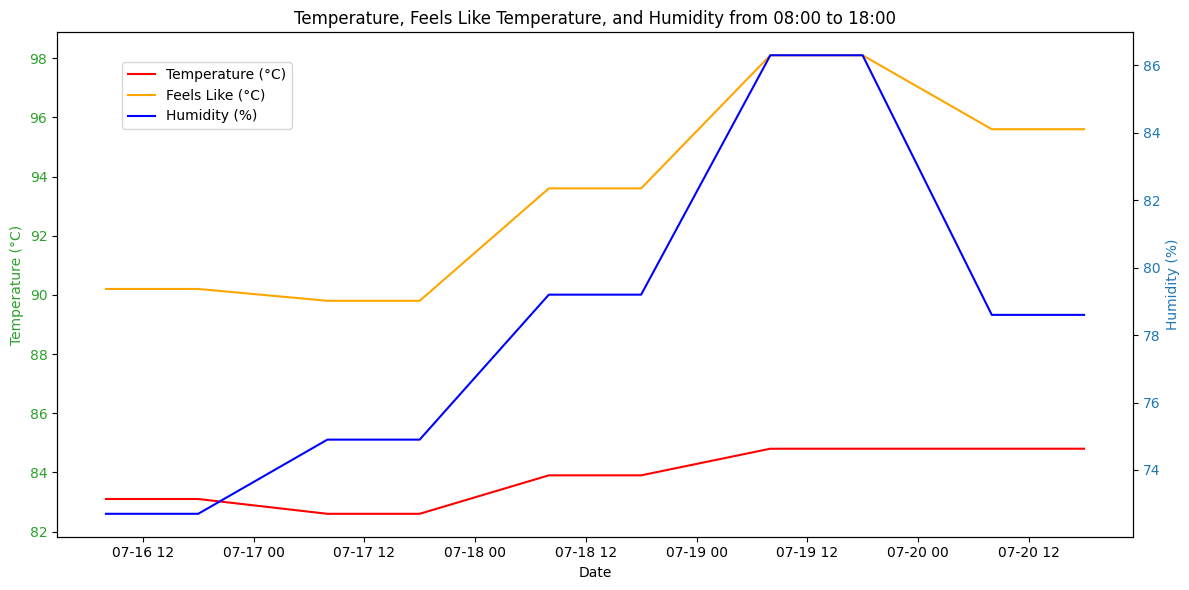

In [130]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))



# Plot temperature and feels like temperature on primary Y-axis without markers
ax1.plot(df.index, df['temp'], 'r', label='Temperature (°C)')
ax1.plot(df.index, df['feelslike'], 'orange', label='Feels Like (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Creating secondary Y-axis for Humidity without markers
ax2 = ax1.twinx()
ax2.plot(df.index, df['humidity'], 'b', label='Humidity (%)')
ax2.set_ylabel('Humidity (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adding a title
plt.title('Temperature, Feels Like Temperature, and Humidity from 08:00 to 18:00')

# Rotate x-ticks
plt.xticks(rotation=90)

# Adding legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Displaying the chart
plt.tight_layout()
plt.show()

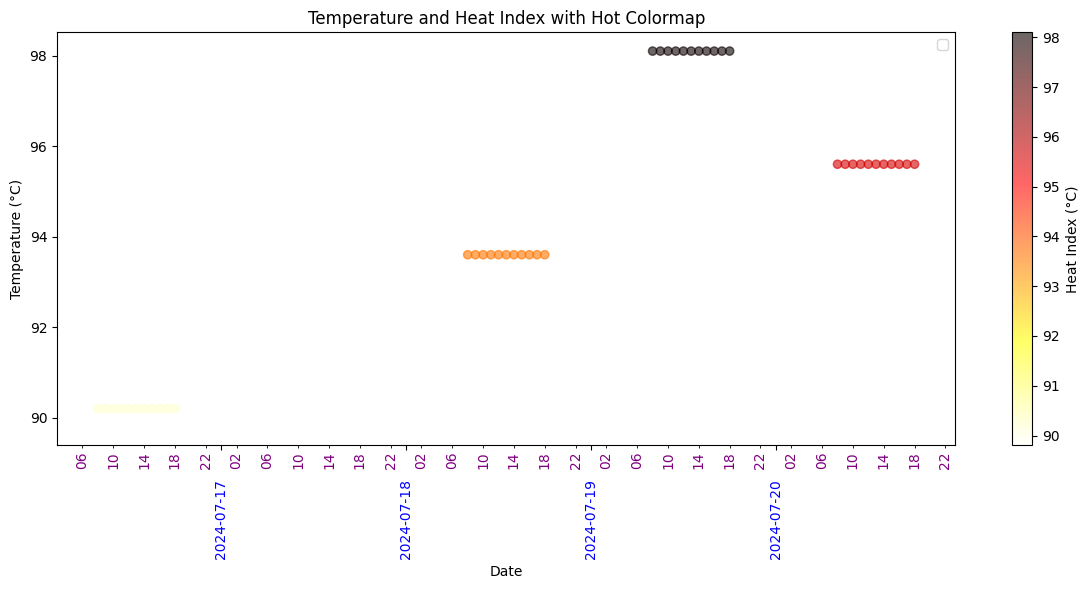

In [131]:
import matplotlib.dates as mdates


# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['feelslike'], c=df['feelslike'],cmap=plt.cm.hot_r,  alpha=0.6)

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index (°F)')

# Set labels
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°F)')
plt.xticks(rotation=90)

# Set major and minor ticks format
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))

# Rotate x-ticks
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90, color='purple', ha='center', va='bottom')

# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)

ax.tick_params(axis='x', which='major', pad=15)


# Adding a title
plt.title('Temperature and Heat Index with Hot Colormap')

# Adding legends
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

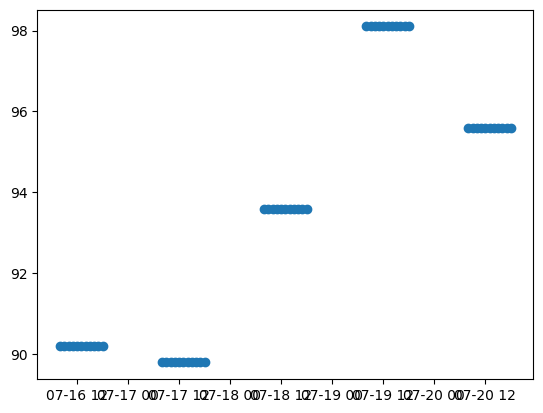

In [136]:
plt.scatter(df.index,df['feelslike'])